In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logbook 1: Danny Phan (21001091)

## Introduction (10/02/2023)

Welcome to the first edition of the logbook for the Computational Physics Mini-Project. In here I will document my progress in writing up the mini project, including records of:

- Developing and testing my code
- Any issues I encounter, and how I've mitigated them
- Developments of thoughts and ideas on the project

In terms of writing up the report, I will be doing this with LaTeX (using Overleaf), linked [here](https://www.overleaf.com/read/mjmczktjdhgh). 

## Working on the three body problem (10/02/2023)

There's quite a lot of work here to do. Thankfully, I've already completed half of the first part of this project in the week 4 assignment. What's left is to create a three-body orbit, as well as evolve one of the previous orbital systems using a higher order method.

In addition, I'll probably make some changes to my code for assignment 4 based on the feedback I receive, but as I'm still waiting for that, I will just carry on with the code. 

So, I'll input the initial conditions given by the briefing, as well as the `force` function from Week 4.

In [2]:
# Parameters

m1 = 1
m2 = 3e-6
m3 = 3.6e-8

G = 1

r12 = 1
r23 = 0.0025

# Creating the empty arrays for all of the variables

Nsteps = 120000
Ndim = 2

R1 = np.zeros((Nsteps, Ndim))
R2 = np.zeros((Nsteps, Ndim))
R3 = np.zeros((Nsteps, Ndim))

V1 = np.zeros((Nsteps, Ndim))
V2 = np.zeros((Nsteps, Ndim))
V3 = np.zeros((Nsteps, Ndim))

KE1 = np.zeros(Nsteps)
KE2 = np.zeros(Nsteps)
KE3 = np.zeros(Nsteps)

PE1 = np.zeros(Nsteps)
PE2 = np.zeros(Nsteps)
PE3 = np.zeros(Nsteps)

L1 = np.zeros(Nsteps)
L2 = np.zeros(Nsteps) 
L3 = np.zeros(Nsteps)

In [3]:
def force(m1, m2, r1, r2):
    """
    Returns the force acting on m1 due to m2
    inputs:
    m1    mass of body 1
    m2    mass of body 2
    r1    radius of body 1
    r2    radius of body 2
    outputs:
    f     the force acting on m1 due to m2  
    """
   
    r_12 = r2 - r1
   
    r_12_mag = np.linalg.norm(r_12) ** 3
    
    f = (m1 * m2 * r_12) / r_12_mag
    return f

### Working out the velocity (10/02/2023)

I've decided to use the second, "more accurate" method of approximating the initial velocities of all of the masses, involving center of mass frames. This is where we'd consider the masses $m_2$ and $m_3$ to be a combined mass, $m_{23} = m_2 + m_3$, where its combined orbit will be around the center of mass between $m_2$ and $m_3$. If we then consider that $m_{23}$ is also inside another centre of mass frame with $m_1$, we can work out all of the velocities, $v_1, v_2, v_3$.

This was quite hard to figure out, but after taking a break I think this is the correct procedure. I might ask the mentors on the monday of reading week if this is correct. 

We know the positions of the bodies $m_2$ and $m_3$, and I will place $m_1$ at the origin, i.e. $r_1 = \begin{pmatrix} 0\\ 0 \end{pmatrix}\;$

Firstly, I looked at the $m_2$ and $m_3$ frame, denoting their velocities in this frame as $v'_2$ and $v'_3$:

Since this is essentially a moon-planet orbit, I think it's appropriate to think of the planet as being effectively stationary while the moon orbits it, i.e., $v'_2 = 0$, implying that the velocity of $v_2$ in the lab frame is the same as the center of mass velocity. 

We can verify this by working out the center of mass radius of this system, $R_{23}$:

$$R_{23} = \frac{m_2 \vec{r_2} + m_3 \vec{r_3}}{m_{23}}$$

Substituting  $r_2 = \begin{pmatrix} r_{12}\\ 0 \end{pmatrix}\;$, $r_3 = \begin{pmatrix} r_{12} + r_{23}\\ 0 \end{pmatrix}\;$, $m_2 = 3\times 10^{-6},    m_3 = 3.6\times 10^{-8}$, where $r_{12} = 1, r_{23} =0.0025$   we get 

$$\vec{R_{23}} = \frac{3\times 10^{-6} \begin{pmatrix} 1\\ 0 \end{pmatrix} +3.6\times 10^{-8} \begin{pmatrix} 1.0025\\ 0 \end{pmatrix}}{ 3\times 10^{-6}+3.6\times 10^{-8}}$$

$$\therefore \vec{R_{23}} = \begin{pmatrix} 1.000029644 \\0 \end{pmatrix} \approx \vec{r_2}$$

The center of mass is basically on $m_2$, since $m_2>>m_1$.

Moving onwards, we can say that $m_3$ orbits $m_2$ with the speed

$$\frac{m_3 v_3'^2}{r_3} = \frac{Gm_3 m_2}{r_{23}^2}$$


$$\therefore v_3' = \sqrt{\frac{Gm_3 m_2}{r_{23}^2} \times r_3 \div m_3} = \sqrt{\frac{G m_2 r_3}{r_{23}^2}} $$


Remember, for this frame we can write

$$v_3 = v_3' + V_{23} = \sqrt{\frac{G m_2 r_3}{r_{23}^2}} + V_{23} $$

$$v_2 = v_2' + V_{23} = V_{23} $$


Now what is ${V_{23}}$? If we consider the frame of $m_1$ and $m_{23} = m_2 + m_3$, we'd imagine this is basically a slightly bigger planet orbiting a star.

Following the same logic from before, since $m_1 >> m_{23}$, we can assume that this is a stationary star being orbited around by a planet, meaning the velocity of the star is the velocity of the center of mass, i.e., $v_1' = 0$, in fact, I'm also going to go ahead and assume that initially, the star in the lab frame will be stationary: $v_1 = 0$.

The velocity of $m_{23}$ in this frame is therefore the orbital speed. 

$$v_{23}' (=V_{23}) = \sqrt{\frac{Gm_1}{R_{1-23}}} $$

Since $m_1 >> m_{23}$, $R_{COM}$ is at $m_1$, meaning $R_{1-23}$ is the distance from the center of $m_1$ (at the origin) to the center of $m_{23}$, which is $=1.000029644$

$$\therefore v_{23}' (=V_{23}) = \sqrt{\frac{1}{1.000029644}} = 0.9999851783 \, \text{ms}^{-1} $$

So then we have that

$$v_1 =  0$$

$$v_2 = \sqrt{\frac{Gm_1}{R_{1-23}}}$$

$$v_3 = \sqrt{\frac{G m_2 r_3}{r_{23}^2}}  + \sqrt{\frac{Gm_1}{R_{1-23}}}$$ (mass 3 is orbiting mass 2, which is orbiting mass 1)

### It's 2AM and it's not working (11/02/2023) 

As the title says, my initial velocities aren't working out so I'm just going to have to set them aside and use the first method to work out the initial velocities. I have spent way too long on this.

### It's 11AM and it works (11/02/2023)

The orbit works with the initial velocities without center of mass calculations, even though the plot looks quite like two planets orbiting a star, if you take the difference of the movements of $m_3$ and $m_2$ you can see that $m_3$ does indeed orbit around its planet. I achieved this result before but after setting `%matplotlib inline` to `%matplotlib notebook` I was able to zoom in and see that the moon does orbit the planet.

I was expecting little loop-de-loops around the planet, leading me to think everything I did was incorrect, but it turns out I was doing fine.

I then looked at the difference between my center of mass velocities and the velocities that worked, and found that I had made an error in calculating my $v_3'$. The equation

$$v_3' = \sqrt{\frac{G m_2 r_3}{r_{23}^2}}$$

Is correct, but since we're working in a center of mass frame with $m_2$ at the origin, it turns out that $r_{23} = r_3$, so this simplifies to the orbit speed equation

$$v_3' = \sqrt{\frac{G m_2 }{r_{23}}}$$

I'll detail the differences between the two methods in a printed statement below

In [4]:
OLDV1 = np.copy(V1)
OLDV2 = np.copy(V2)
OLDV3 = np.copy(V3)

# Initial Conditions

R2[0] = np.array([r12, 0]) # Leaving m1 at the origin
R3[0] = np.array([r23 + r12, 0]) # Distance between mass 2 and 3 is 0.0025

# Working out velocities

# Center of mass frame calculations
v3prime = np.sqrt(G*m2 / r23)

R23COM = (m2 + m3)**(-1) * (m2 * R2[0] + m3* R3[0]) 
v23prime = np.sqrt(m1/np.linalg.norm(R23COM)) 

V1[0] = np.array([0, 0])
V2[0] = np.array([0, v23prime])
V3[0] = np.array([0, v23prime + v3prime])

# Non-COM calculations

OLDV1[0] = np.array([0,0])
OLDV2[0] = np.array([0,np.sqrt(G * m1 / r12)])
OLDV3[0] = np.array([0,np.sqrt(G * m1 / r12)+np.sqrt(G * m2 / r23)])

print(f"The initial velocity of m1 in COM is {V1[0]}. In the non-COM frame this was {OLDV1[0]}")
print(f"The initial velocity of m2 in COM is {V2[0]}. In the non-COM frame this was {OLDV2[0]}")
print(f"The initial velocity of m3 in COM is {V3[0]}. In the non-COM frame this was {OLDV3[0]}")



The initial velocity of m1 in COM is [0. 0.]. In the non-COM frame this was [0. 0.]
The initial velocity of m2 in COM is [0.         0.99998518]. In the non-COM frame this was [0. 1.]
The initial velocity of m3 in COM is [0.         1.03462619]. In the non-COM frame this was [0.         1.03464102]


As you can see, there isn't much difference between these velocity values, but I'll go with the more accurate one.

My Verlet algorithm is here below, the underlying idea is exactly the same as in the week4 assignment, but now I have added another force acting on the masses, i.e., before $m_1$ would only have the gravitational pull of $m_2$ acting on it, but now $m_3$ is also there: $F_1 = F_{12} + F_{13}$.

Obviously I also had to add another two variables for mass 3.

The algorithm expectedly takes longer than before, and has a wall time of ~27s, I might try and improve this later.

In [5]:
%%time

dt = 1e-4

for i in range(Nsteps - 1):
    R1[i+1] = R1[i] + dt * V1[i] + dt**2 * (force(m1, m2, R1[i], R2[i]) + force(m1, m3, R1[i], R3[i]))/(2*m1)
    R2[i+1] = R2[i] + dt * V2[i] + dt**2 * (force(m2, m1, R2[i], R1[i]) + force(m2, m3, R2[i], R3[i]))/(2*m2)
    R3[i+1] = R3[i] + dt * V3[i] + dt**2 * (force(m3, m1, R3[i], R1[i]) + force(m3, m2, R3[i], R2[i]))/(2*m3) 
    
    
    V1[i+1] = V1[i] + dt * (force(m1, m2, R1[i], R2[i]) + force(m1, m2, R1[i+1], R2[i+1]) + force(m1, m3, R1[i], R3[i]) + force(m1, m3, R1[i+1], R3[i+1])) / (2*m1)
    V2[i+1] = V2[i] + dt * (force(m2, m1, R2[i], R1[i]) + force(m2, m1, R2[i+1], R1[i+1]) + force(m2, m3, R2[i], R3[i]) + force(m2, m3, R2[i+1], R3[i+1])) / (2*m2)
    V3[i+1] = V3[i] + dt * (force(m3, m1, R3[i], R1[i]) + force(m3, m1, R3[i+1], R1[i+1]) + force(m3, m2, R3[i], R2[i]) + force(m3, m2, R3[i+1], R2[i+1])) / (2*m3)

Wall time: 28.1 s


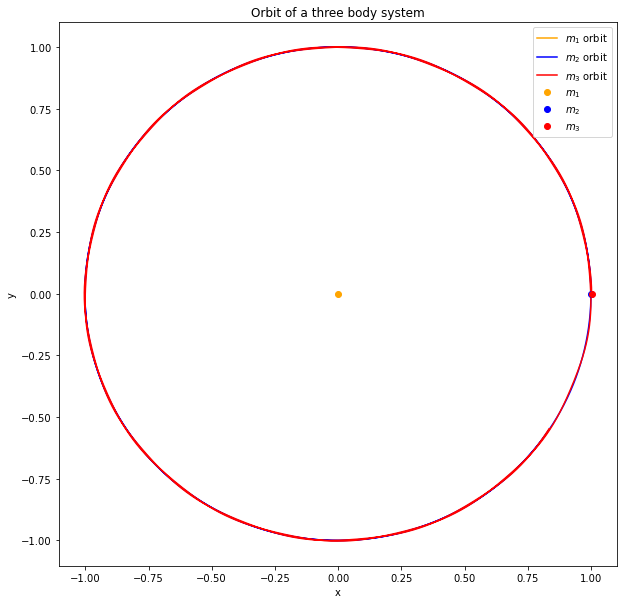

In [6]:
plt.figure(figsize = (10,10))

plt.plot(R1[:,0], R1[:,1], label = r"$m_1$ orbit", color = 'orange')
plt.plot(R2[:,0], R2[:,1], label = r"$m_2$ orbit", color = 'blue')
plt.plot(R3[:,0], R3[:,1], label = r"$m_3$ orbit", color = 'red')

plt.plot(R1[0,0],R1[0,1], 'bo', color = 'orange', label = r"$m_1$")
plt.plot(R2[0,0],R2[0,1], 'bo', color = 'blue',label = r"$m_2$")
plt.plot(R3[0,0],R3[0,1], 'bo', color = 'red', label = r"$m_3$")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Orbit of a three body system")
plt.legend(loc = 'upper right')

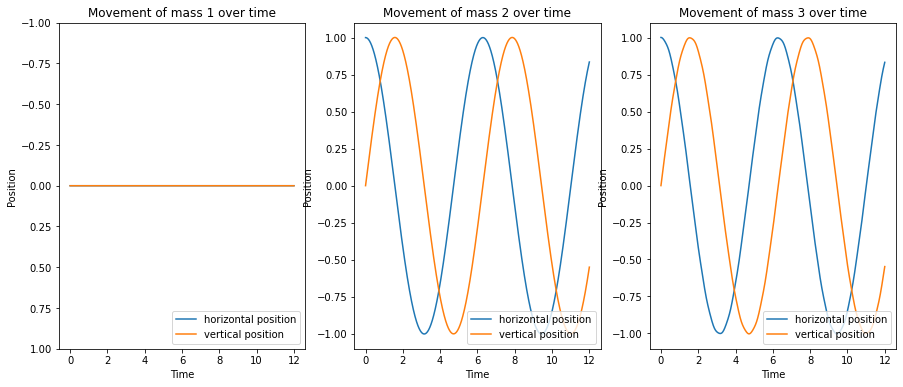

In [38]:
tarr = np.arange(0, Nsteps * dt, dt)

fig, axs = plt.subplots(1,3,figsize = (15,6))

axs[0].plot(tarr, R1[:,0], label = "horizontal position")
axs[0].plot(tarr, R1[:,1], label = "vertical position")
axs[0].set_ylim(1,-1)

axs[1].plot(tarr, R2[:,0], label = "horizontal position")
axs[1].plot(tarr, R2[:,1], label = "vertical position")

axs[2].plot(tarr, R3[:,0], label = "horizontal position")
axs[2].plot(tarr, R3[:,1], label = "vertical position")

for i in range(3):
        axs[i].legend(loc = 'lower right')
        axs[i].set_xlabel("Time")
        axs[i].set_ylabel("Position")
        axs[i].set_title(f"Movement of mass {i+1} over time")

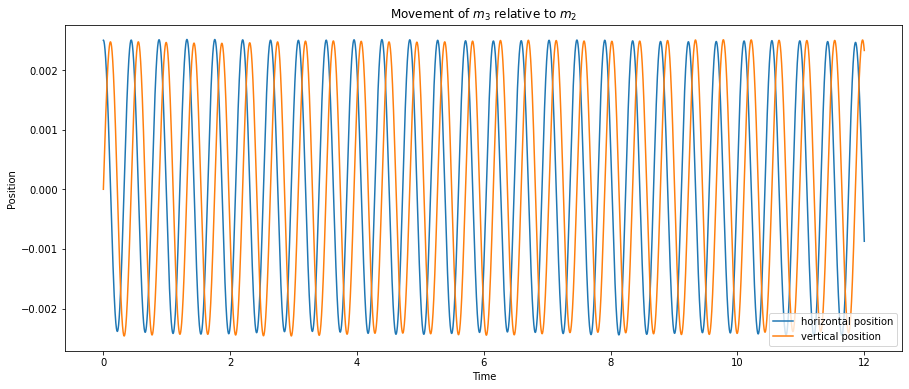

In [33]:
plt.figure(figsize = (15,6))
plt.title(r"Movement of $m_3$ relative to $m_2$")
plt.plot(tarr, R3[:,0] - R2[:,0], label = "horizontal position")
plt.plot(tarr, R3[:,1]- R2[:,1], label = "vertical position")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(loc = 'lower right')

So as one can see, mass 1 stays relatively still the entire time (although if you remove the `ylim` you can see it does move a little bit), and mass 2 and mass 3 orbit around mass 1. Mass 3 also orbits around mass 2, as seen in the second figure. If we calculate the energies and angular momenta...

In [34]:
%%time
Norms = np.zeros((3, Nsteps))

for i in range(Nsteps - 1):
    
    Norms[0, i] = np.linalg.norm(V1[i])
    Norms[1, i] = np.linalg.norm(V2[i])
    Norms[2, i] = np.linalg.norm(V3[i])
    R_12 = np.linalg.norm(R2[i] - R1[i])
    R_23 = np.linalg.norm(R3[i] - R2[i])
    R_13 = np.linalg.norm(R3[i] - R1[i])
    
    KE1[i+1] = KE1[i] + 0.5 * m1 * Norms[0, i]**2 *dt
    PE1[i+1] = PE1[i] - ((G*m1*m2/R_12) + (G*m1*m3/R_13)) * dt
    L1[i+1] = L1[i] + m1 * Norms[0, i] * (R_12 + R_13) *dt
  
    KE2[i+1] = KE2[i] + 0.5 * m1 * Norms[0, i]**2 *dt
    PE2[i+1] = PE2[i] - (-(G*m2*m1/R_12) + (G*m2*m3/R_23)) * dt
    L2[i+1] = L2[i] + m2 * Norms[1, i] * (-R_12 + R_23) *dt
    
    KE3[i+1] = KE3[i] + 0.5 * m1 * Norms[0, i]**2 *dt
    PE3[i+1] = PE3[i] - (-(G*m2*m3/R_23) -(G*m2*m3/R_13)) * dt
    L3[i+1] = L3[i] + m3 * Norms[2, i] * (-R_13 - R_23) *dt
    
    

Wall time: 6.22 s


It looks to me like Energy and angular momentum is conserved. 

Below, I use the equations

$$E_1 = E_2 + E_3$$ 

$$L_1 = L_2 + L_3$$

Where $E_1$ is the total energy of $m_1$, and I'm sure you can guess the rest.

(-1.0, 1.0)

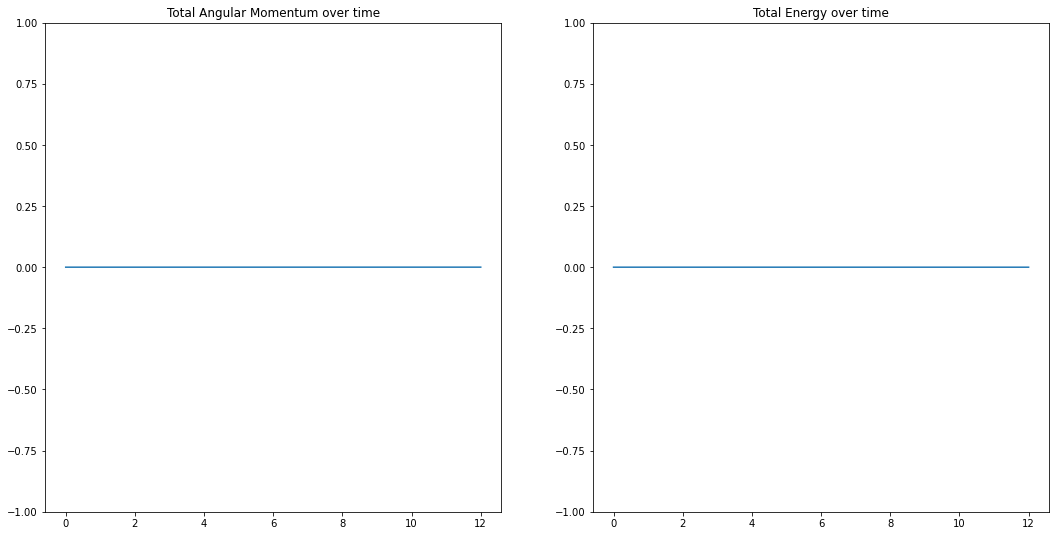

In [35]:
fig2, ax2s = plt.subplots(1, 2, figsize = (18,9))

ax2s[0].set_title("Total Angular Momentum over time")
ax2s[0].plot(tarr,L1-L2-L3)
ax2s[0].set_ylim(-1,1)


ax2s[1].set_title("Total Energy over time")
ax2s[1].plot(tarr, PE1-PE2-PE3+KE1-KE2-KE3)
ax2s[1].set_ylim(-1,1)

This concludes the first logbook.